# Categorical Representation of Changes in Daily Bitcoin Price

Compared using the "open" price.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Analysis

In [26]:
btc = pd.read_csv('data/raw_bitcoin_price.csv', sep='\t')

In [27]:
btc.head()

,Unnamed: 0,open,high,low,close,volume
0,2021-01-01,28923.63,29600.00,28624.57,29331.69,54182.925011
1,2021-01-02,29331.70,33300.00,28946.53,32178.33,129993.873362
2,2021-01-03,32176.45,34778.11,31962.99,33000.05,120957.566750
3,2021-01-04,33000.05,33600.00,28130.00,31988.71,140899.885690
4,2021-01-05,31989.75,34360.00,29900.00,33949.53,116049.997038


In [28]:
#Change the Unamed column name to Date
btc.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
btc.head()

,Date,open,high,low,close,volume
0,2021-01-01,28923.63,29600.00,28624.57,29331.69,54182.925011
1,2021-01-02,29331.70,33300.00,28946.53,32178.33,129993.873362
2,2021-01-03,32176.45,34778.11,31962.99,33000.05,120957.566750
3,2021-01-04,33000.05,33600.00,28130.00,31988.71,140899.885690
4,2021-01-05,31989.75,34360.00,29900.00,33949.53,116049.997038


In [29]:
#Find usual difference in daily open price
btc["Diff_Open"] = btc["open"].diff()

In [30]:
btc["Diff_Open"].describe()

count     242.000000
mean       74.625124
std      1957.740449
min     -7132.870000
25%     -1004.010000
50%         1.170000
75%      1153.375000
max      7579.170000
Name: Diff_Open, dtype: float64

<AxesSubplot:>

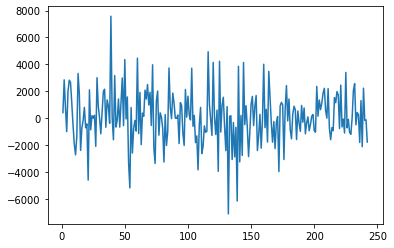

In [31]:
btc["Diff_Open"].plot()

array([[<AxesSubplot:title={'center':'Diff_Open'}>]], dtype=object)

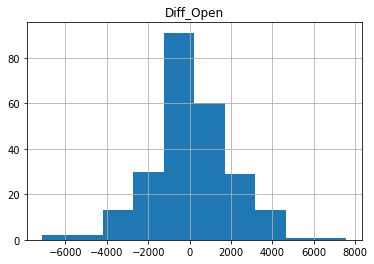

In [32]:
btc.hist(column='Diff_Open')

Based on the Graph and metrics above, the categories for price difference are:

- -2 (Large Decrease in Price) : diff <-4000
- -1 (Moderate Decrease in Price): -4000 <= diff < -500
- 0 (No Commendable Difference) : -500 <= diff <= 500
- 1 (Moderate Increase in Price): 500 < diff <= 4000
- 2 (Large Increase in Price): 4000 < diff

## Categorization

In [33]:
#Reference: https://datagy.io/pandas-conditional-column/


conditions = [
    (btc['Diff_Open'] < -4000),
    (btc['Diff_Open'] >= -4000) & (btc['Diff_Open'] < -500),
    (btc['Diff_Open'] >= -500) & (btc['Diff_Open'] <= 500),
    (btc['Diff_Open'] > 500) & (btc['Diff_Open'] <= 4000),
    (btc['Diff_Open'] > 4000)
]
values = [-2, -1, 0, 1, 2]
btc['Diff_Category'] = np.select(conditions, values)

btc

,Date,open,high,low,close,volume,Diff_Open,Diff_Category
0,2021-01-01,28923.63,29600.00,28624.57,29331.69,54182.925011,NaN,0
1,2021-01-02,29331.70,33300.00,28946.53,32178.33,129993.873362,408.07,0
2,2021-01-03,32176.45,34778.11,31962.99,33000.05,120957.566750,2844.75,1
3,2021-01-04,33000.05,33600.00,28130.00,31988.71,140899.885690,823.60,1
4,2021-01-05,31989.75,34360.00,29900.00,33949.53,116049.997038,-1010.30,-1
...,...,...,...,...,...,...,...,...
238,2021-08-27,46843.86,49149.93,46348.00,49069.90,42068.104965,-2129.46,-1
239,2021-08-28,49069.90,49299.00,48346.88,48895.35,26681.063786,2226.04,1
240,2021-08-29,48895.35,49632.27,47762.54,48767.83,32652.283473,-174.55,0
241,2021-08-30,48767.84,48888.61,46853.00,46982.91,40288.350830,-127.51,0


In [34]:
btc["Diff_Category"].value_counts()

-1    88
 1    84
 0    59
 2     8
-2     4
Name: Diff_Category, dtype: int64

In [35]:
#Save 
data_path = 'data/categorical_bitcoin_price.csv'
btc.to_csv(data_path, sep='\t')

# Categorical Representation of Changes in Hourly Bitcoin Prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Analysis

In [2]:
btc = pd.read_csv('../../data/hourly_data/bitcoin_hourly.csv', sep=',', index_col=None)
btc.head()

,date,open,high,low,close,Volume BTC,Volume USD
0,2021-08-31 23:00:00,47102.74,47365.57,47000.05,47156.09,52.281015,2.465368e+06
1,2021-08-31 22:00:00,46942.58,47127.13,46771.13,47100.38,199.495397,9.396309e+06
2,2021-08-31 21:00:00,47020.10,47213.49,46845.05,46950.00,138.092514,6.483444e+06
3,2021-08-31 20:00:00,47306.81,47345.65,46926.40,47003.10,81.363207,3.824323e+06
4,2021-08-31 19:00:00,47326.70,47422.72,47205.86,47321.52,95.043733,4.497614e+06


In [3]:
#Find usual difference in hourly open price
btc["Diff_Open"] = btc["open"].diff()
btc["Diff_Open"].describe()

count    5831.000000
mean       -3.104632
std       437.503594
min     -3984.430000
25%      -219.305000
50%        -8.750000
75%       202.695000
max      4795.170000
Name: Diff_Open, dtype: float64

array([[<AxesSubplot:title={'center':'Diff_Open'}>]], dtype=object)

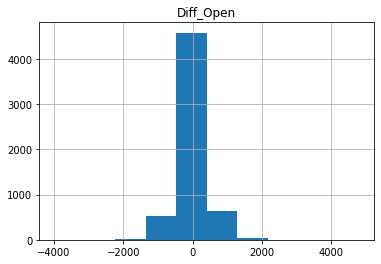

In [4]:
btc.hist(column='Diff_Open')

<AxesSubplot:>

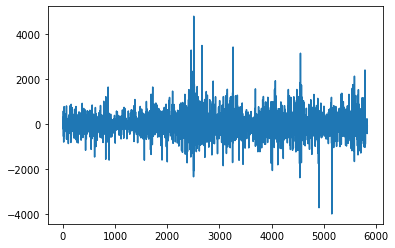

In [5]:
btc["Diff_Open"].plot()

Based on the Graph and metrics above, the categories for price difference are:

- -1 (Decrease in Price):  diff < -150
- 0 (No Commendable Difference) : -150 <= diff <= 150
- 1 (Increase in Price): 150 < diff 

## Categorization

In [12]:
#Reference: https://datagy.io/pandas-conditional-column/


conditions = [
    (btc['Diff_Open'] < -150),
    (btc['Diff_Open'] >= -150) & (btc['Diff_Open'] <= 150),
    (btc['Diff_Open'] > 150)
]
values = [ -1, 0, 1]
btc['Diff_Category'] = np.select(conditions, values)

btc

,date,open,high,low,close,Volume BTC,Volume USD,Diff_Open,Diff_Category
0,2021-08-31 23:00:00,47102.74,47365.57,47000.05,47156.09,52.281015,2.465368e+06,NaN,0
1,2021-08-31 22:00:00,46942.58,47127.13,46771.13,47100.38,199.495397,9.396309e+06,-160.16,-1
2,2021-08-31 21:00:00,47020.10,47213.49,46845.05,46950.00,138.092514,6.483444e+06,77.52,0
3,2021-08-31 20:00:00,47306.81,47345.65,46926.40,47003.10,81.363207,3.824323e+06,286.71,1
4,2021-08-31 19:00:00,47326.70,47422.72,47205.86,47321.52,95.043733,4.497614e+06,19.89,0
...,...,...,...,...,...,...,...,...,...
5827,2021-01-01 04:00:00,29351.85,29458.27,29121.80,29290.38,325.565700,9.535943e+06,57.27,0
5828,2021-01-01 03:00:00,29249.33,29414.48,29216.61,29345.63,284.146568,8.338460e+06,-102.52,0
5829,2021-01-01 02:00:00,29484.39,29535.95,29189.34,29249.33,290.242637,8.489403e+06,235.06,1
5830,2021-01-01 01:00:00,29070.66,29543.93,29010.36,29479.12,648.597652,1.912009e+07,-413.73,-1


In [13]:
btc["Diff_Category"].value_counts()

 0    2217
-1    1871
 1    1744
Name: Diff_Category, dtype: int64

In [14]:
btc.to_csv('../../data/hourly_data/categorical_bitcoin_hourly.csv', sep='\t', index=None)